# Advanced Regression Assignment

### 1. Data Understanding and Exploration

In [140]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [141]:
# Reading the dataset

house = pd.read_csv("C:/Users/chandrasen.wadikar/Desktop/train.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [142]:
# Summary of the dataset

print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [143]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [144]:
# MSSubClass: -2 (least risky) to +3 most risky
# Most MSSubClass of houses are 0,1,2
house['MSSubClass'].astype('category').value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [145]:
house['Street'].astype('category').value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [146]:
# Check the NULL values in Dataset
house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [147]:
# After analyzing the dataset , convert the NA values to Zero
house= house.fillna("0")

In [148]:
# Check whether the NA values converted into the Zero.
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [149]:
# Check the available utlities which provided by the organization
house['Utilities'].astype('category').value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [150]:
# Converting categorial into contineous variable
varlist =['Utilities']
house[varlist] = house[varlist].apply(lambda X: X.map({'AllPub':1,'NoSeWa':0})) # subsetting /converting categorical into numeric
house[varlist]

,Utilities
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [151]:
varlist1 =['Street']
house[varlist1] = house[varlist1].apply(lambda X: X.map({'Pave':1,'Grvl':0})) # subsetting /converting categorical into numeric
house[varlist1]

,Street
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [152]:
house['MiscFeature'] = house['MiscFeature'].replace(np.nan, 0)

In [153]:
varlist2 =['MiscFeature']
house[varlist2] = house[varlist2].apply(lambda X: X.map({'Shed':1,'Gar2':0,'Othr':2,'TenC':3})) # subsetting /converting categorical into numeric
house[varlist2]

,MiscFeature
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,1.0
6,NaN
7,1.0
8,NaN
9,NaN


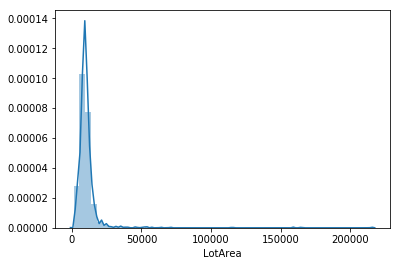

In [154]:
# LotArea : is one of the parameter, where normally buyer definately think on this varaible.
sns.distplot(house['LotArea'])
plt.show()


In [155]:
varlist3 =['LandSlope']
house[varlist3] = house[varlist3].apply(lambda X: X.map({'Gtl':1,'Mod':0,'Sev':2})) # subsetting /converting categorical into numeric
house[varlist3]


,LandSlope
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [156]:
varlist4 =['HouseStyle']
house[varlist4] = house[varlist4].apply(lambda X: X.map({'1Story':1,'1.5Fin':0,'1.5Unf':2,'2Story':3,'2.5Fin':4,'2.5Unf':5,'SFoyer':6,'SLvl':7})) # subsetting /converting categorical into numeric
house[varlist4]

,HouseStyle
0,3
1,1
2,3
3,3
4,3
5,0
6,1
7,3
8,0
9,2


In [157]:
varlist5 =['ExterCond']
house[varlist5] = house[varlist5].apply(lambda X: X.map({'Ex':1,'Gd':0,'TA':2,'Fa':3,'Po':4})) # subsetting /converting categorical into numeric
house[varlist5]

,ExterCond
0,2
1,2
2,2
3,2
4,2
5,2
6,2
7,2
8,2
9,2


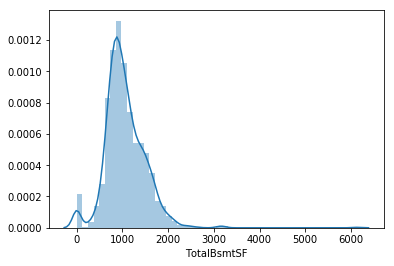

In [158]:
sns.distplot(house['TotalBsmtSF'])
plt.show()

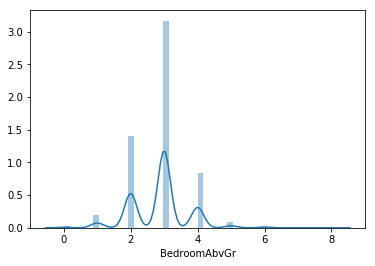

In [209]:
sns.distplot(house['BedroomAbvGr'])
plt.show()

In [159]:
varlist6 =['HeatingQC']
house[varlist6] = house[varlist6].apply(lambda X: X.map({'Ex':1,'Gd':0,'TA':2,'Fa':3,'Po':4})) # subsetting /converting categorical into numeric
house[varlist6]

,HeatingQC
0,1
1,1
2,1
3,0
4,1
5,1
6,1
7,1
8,0
9,1


In [160]:
varlist7 =['CentralAir']
house[varlist7] = house[varlist7].apply(lambda X: X.map({'N':1,'Y':0})) # subsetting /converting categorical into numeric
house[varlist7]

,CentralAir
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [161]:
varlist8 =['KitchenQual']
house[varlist8] = house[varlist8].apply(lambda X: X.map({'Ex':1,'Gd':0,'TA':2,'Fa':3,'Po':4})) # subsetting /converting categorical into numeric
house[varlist8]

,KitchenQual
0,0
1,2
2,0
3,0
4,0
5,2
6,0
7,2
8,2
9,2


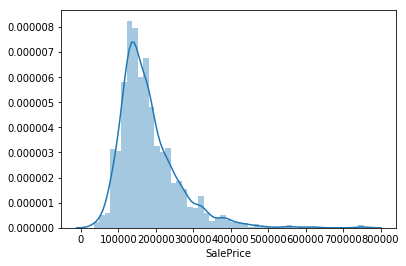

In [162]:
sns.distplot(house['SalePrice'])
plt.show()

#### Data Exploration

In [163]:
# all numeric (float and int) variables in the dataset
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,Id,MSSubClass,LotArea,Street,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,1,1,1,3,7,5,2003,...,61,0,0,0,0,NaN,0,2,2008,208500
1,2,20,9600,1,1,1,1,6,8,1976,...,0,0,0,0,0,NaN,0,5,2007,181500
2,3,60,11250,1,1,1,3,7,5,2001,...,42,0,0,0,0,NaN,0,9,2008,223500
3,4,70,9550,1,1,1,3,7,5,1915,...,35,272,0,0,0,NaN,0,2,2006,140000
4,5,60,14260,1,1,1,3,8,5,2000,...,84,0,0,0,0,NaN,0,12,2008,250000


In [164]:
# dropping MiscFeature and Id 
house_numeric = house_numeric.drop(['MiscFeature'], axis=1)
house_numeric.head()

,Id,MSSubClass,LotArea,Street,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,1,1,1,3,7,5,2003,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,1,1,1,1,6,8,1976,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,1,1,1,3,7,5,2001,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,1,1,1,3,7,5,1915,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,1,1,1,3,8,5,2000,...,192,84,0,0,0,0,0,12,2008,250000


#### Let's now make a pairwise scatter plot and observe linear relationships.

In [166]:
plt.figure(figsize=(20,10))
sns.pairplot(house_numeric)
plt.show()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [167]:
# Correlation Matrix
cor = house_numeric.corr()
cor

,Id,MSSubClass,LotArea,Street,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.033226,0.008916,-0.013324,-0.043606,0.025377,-0.028365,0.012609,-0.012713,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.139781,-0.024969,0.022844,0.009834,0.404891,0.032628,-0.059316,0.027850,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,-0.033226,-0.139781,1.000000,-0.197131,-0.010123,0.138608,-0.036430,0.105806,-0.005636,0.014228,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
Street,0.008916,-0.024969,-0.197131,1.000000,-0.001682,0.083742,0.010976,0.058823,0.042848,0.021137,...,-0.017990,-0.005664,0.023082,0.007473,-0.033160,0.004413,-0.022733,0.003690,-0.025043,0.041036
Utilities,-0.013324,0.022844,-0.010123,-0.001682,1.000000,-0.004083,-0.078525,0.001881,-0.009994,0.011505,...,0.019692,-0.028199,0.009407,0.003046,-0.102365,0.001798,0.002296,0.051552,-0.023353,0.014314
LandSlope,-0.043606,0.009834,0.138608,0.083742,-0.004083,1.000000,0.006442,0.026388,-0.024486,0.038236,...,-0.043619,0.001057,-0.007480,0.015790,-0.049655,0.010713,0.015768,0.004150,0.025796,-0.027300
HouseStyle,0.025377,0.404891,-0.036430,0.010976,-0.078525,0.006442,1.000000,0.127414,0.025088,0.145987,...,0.056954,0.082858,-0.021331,-0.027334,-0.014141,0.082849,-0.035276,0.026900,-0.020652,0.085267
OverallQual,-0.028365,0.032628,0.105806,0.058823,0.001881,0.026388,0.127414,1.000000,-0.091932,0.572323,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.005636,0.042848,-0.009994,-0.024486,0.025088,-0.091932,1.000000,-0.375983,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.014228,0.021137,0.011505,0.038236,0.145987,0.572323,-0.375983,1.000000,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897


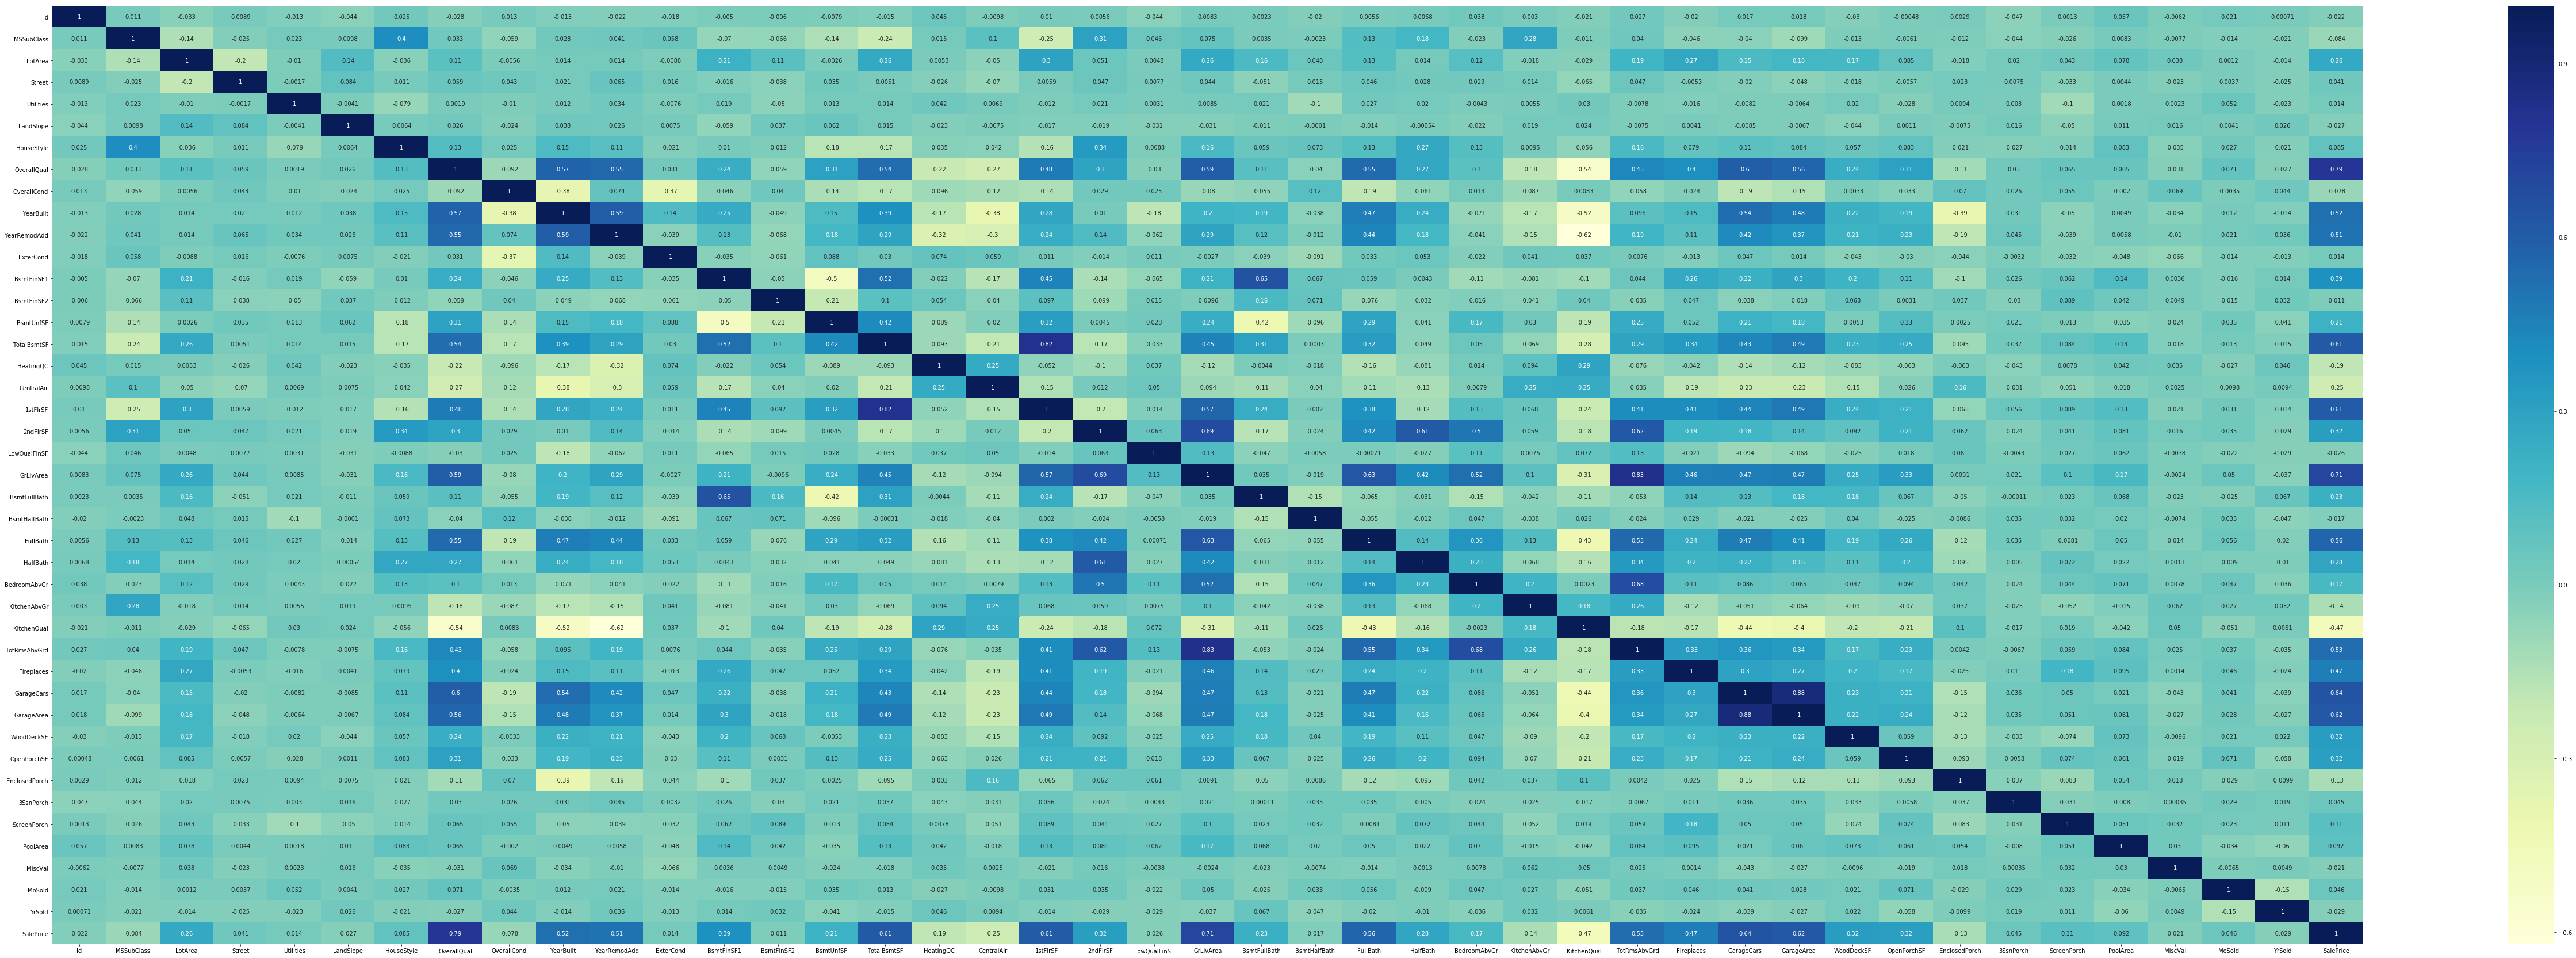

In [171]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(90,30))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


### 2. Data Cleaning

In [173]:
house.info()  # Variable formats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null int64
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null int64
LotConfig        1460 non-null object
LandSlope        1460 non-null int64
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null

In [174]:
# converting MSSubClass to categorical
house['MSSubClass'] = house['MSSubClass'].astype('object')
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null int64
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null int64
LotConfig        1460 non-null object
LandSlope        1460 non-null int64
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-nul

In [175]:
house.describe()

,Id,LotArea,Street,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,54.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,10516.828082,0.995890,0.999315,0.964384,1.954110,6.099315,5.575342,1971.267808,1984.865753,...,46.660274,21.954110,3.409589,15.060959,2.758904,1.037037,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,9981.264932,0.063996,0.026171,0.228455,1.682862,1.382997,1.112799,30.202904,20.645407,...,66.256028,61.119149,29.317331,55.757415,40.177307,0.386711,496.123024,2.703626,1.328095,79442.502883
min,1.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,7553.500000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,1954.000000,1967.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,9478.500000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,1973.000000,1994.000000,...,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,11601.500000,1.000000,1.000000,1.000000,3.000000,7.000000,6.000000,2000.000000,2004.000000,...,68.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,215245.000000,1.000000,1.000000,2.000000,7.000000,10.000000,9.000000,2010.000000,2010.000000,...,547.000000,552.000000,508.000000,480.000000,738.000000,3.000000,15500.000000,12.000000,2010.000000,755000.000000


In [184]:
house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu         0
GarageType          0
GarageYrBlt         0
GarageFinish        0
GarageCars          0
GarageArea          0
GarageQual          0
GarageCond          0
PavedDrive

In [185]:
house['MiscFeature'] = house['MiscFeature'].replace(np.nan, 0)

In [186]:
house.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
                ..
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC      

In [187]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null int64
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null int64
LotConfig        1460 non-null object
LandSlope        1460 non-null int64
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-nul

### 3. Data Preparation

In [188]:
# split into X and y
X = house.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd',
       'MasVnrType','MasVnrArea','ExterQual','ExterCond','Foundation','BsmtQual',
       'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2',
        'BsmtUnfSF','TotalBsmtSF','Heating','HeatingQC','CentralAir','Electrical',
        '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath',
        'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd',
        'Functional','Fireplaces','FireplaceQu','GarageType','GarageYrBlt','GarageFinish',
        'GarageCars','GarageArea','GarageQual','GarageCond','PavedDrive','WoodDeckSF',
        'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','PoolQC',
        'Fence','MiscFeature','MiscVal','MoSold','YrSold','SaleType','SaleCondition']]

y = house['SalePrice']


In [189]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()

,MSSubClass,MSZoning,LotFrontage,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,...,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,60,RL,65,0,Reg,Lvl,Inside,CollgCr,Norm,Norm,...,Attchd,2003,RFn,TA,TA,Y,0,0,WD,Normal
1,20,RL,80,0,Reg,Lvl,FR2,Veenker,Feedr,Norm,...,Attchd,1976,RFn,TA,TA,Y,0,0,WD,Normal
2,60,RL,68,0,IR1,Lvl,Inside,CollgCr,Norm,Norm,...,Attchd,2001,RFn,TA,TA,Y,0,0,WD,Normal
3,70,RL,60,0,IR1,Lvl,Corner,Crawfor,Norm,Norm,...,Detchd,1998,Unf,TA,TA,Y,0,0,WD,Abnorml
4,60,RL,84,0,IR1,Lvl,FR2,NoRidge,Norm,Norm,...,Attchd,2000,RFn,TA,TA,Y,0,0,WD,Normal


In [190]:
# convert into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [191]:
# drop categorical variables 
X = X.drop(list(house_categorical.columns), axis=1)

In [192]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [193]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotArea', 'Street', 'Utilities', 'LandSlope', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterCond',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=787)

In [194]:
# split into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### 4. Model Building and Evaluation

###  Ridge Regression

In [199]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    7.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [200]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.052918,0.008675,0.003124,0.006249,0.0001,{'alpha': 0.0001},-27893.736951,-29856.599494,-32807.097867,-28425.807829,...,-29399.634299,1839.958144,28,-5070.430075,-5086.912997,-4788.444420,-5576.135203,-4866.801100,-5077.744759,274.489529
1,0.043839,0.006075,0.006249,0.007654,0.001,{'alpha': 0.001},-27889.013472,-29838.703003,-32787.359050,-28418.022026,...,-29388.560818,1834.153711,27,-5070.494666,-5086.994189,-4788.503867,-5576.172495,-4866.837979,-5077.800639,274.485071
2,0.050001,0.006248,0.003125,0.006250,0.01,{'alpha': 0.01},-27843.564582,-29671.118956,-32596.524462,-28345.126440,...,-29283.084188,1778.225550,26,-5071.128051,-5088.504010,-4789.163682,-5576.545086,-4867.194042,-5078.506974,274.433615
3,0.050001,0.006252,0.000000,0.000000,0.05,{'alpha': 0.05},-27702.410542,-29113.716433,-31878.313518,-28076.340815,...,-28908.278724,1567.514182,25,-5074.289017,-5094.200268,-4792.604112,-5577.969211,-4868.588004,-5081.530122,274.039165
4,0.050005,0.006246,0.003121,0.006242,0.1,{'alpha': 0.1},-27565.666807,-28769.904275,-31270.565319,-27847.677974,...,-28608.150175,1400.563195,24,-5078.096661,-5099.241567,-4796.468299,-5579.613167,-4870.104563,-5084.704851,273.613895


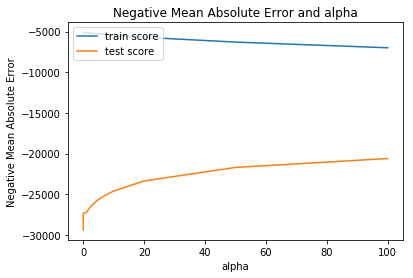

In [201]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [202]:
alpha = 15
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 4.44960154e+03,  2.31401346e+03,  2.37489556e+02, -1.60777271e+03,
       -1.01722649e+03,  9.15660170e+03,  6.75572923e+03,  8.02717659e+03,
        2.84269965e+03,  4.06123641e+02,  7.14907841e+03, -3.12700705e+01,
        1.71818383e+03,  9.15157620e+03, -3.78752170e+02, -7.16918312e+02,
        7.13425651e+03,  7.73656689e+03, -1.66394317e+03,  1.15215366e+04,
        1.37698685e+03, -7.09799124e+02,  2.81739758e+03,  1.53256083e+03,
       -1.49291135e+03, -3.10900727e+03,  6.36659610e+02,  1.98068564e+03,
        3.13450344e+03,  2.13162582e+03,  4.57922855e+03,  1.25612514e+03,
        8.26353958e+02,  1.21961028e+03,  1.67342646e+02, -1.66903568e+01,
       -9.75959199e+02,  1.00978367e+03, -2.89074661e+02, -3.37511993e+02,
       -1.15969394e+03, -6.19597738e+01,  3.34877810e+02,  1.72814310e+02,
       -2.61098732e+02,  2.23646993e+03, -3.60669461e+01, -8.87837218e+01,
        4.76116983e+02, -5.57417237e+02, -7.14329356e+02, -2.13761390e+03,
       -2.05716159e+03, -

### Lasso Regression

In [204]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:  1.7min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [205]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.945252,0.164367,0.001599,0.001959,0.0001,{'alpha': 0.0001},-28072.758752,-29643.310596,-30199.743550,-27988.736659,...,-28611.227386,1129.958878,28,-5088.303199,-5106.827225,-4803.760354,-5581.903002,-4873.610743,-5090.880905,272.399766
1,0.821850,0.157370,0.000000,0.000000,0.001,{'alpha': 0.001},-28071.626827,-29641.843719,-30198.535230,-27986.266745,...,-28609.907432,1129.815531,27,-5088.306930,-5106.834300,-4803.772933,-5581.903571,-4873.612364,-5090.886020,272.397137
2,0.739040,0.046652,0.003922,0.006046,0.01,{'alpha': 0.01},-28060.301845,-29627.229322,-30186.663004,-27964.022033,...,-28597.249462,1128.199395,26,-5088.349276,-5106.911259,-4803.900994,-5581.917939,-4873.635145,-5090.942923,272.372510
3,0.706271,0.006254,0.000000,0.000000,0.05,{'alpha': 0.05},-28009.831475,-29563.518101,-30137.267676,-27886.984235,...,-28550.970573,1114.066241,25,-5088.655541,-5107.358553,-4804.512068,-5582.077268,-4873.857338,-5091.292154,272.270390
4,0.718761,0.031245,0.000000,0.000000,0.1,{'alpha': 0.1},-27947.036856,-29487.315604,-30080.363055,-27816.220793,...,-28501.049095,1094.672928,24,-5089.124195,-5108.048514,-4805.320928,-5582.387718,-4874.220099,-5091.820291,272.161258


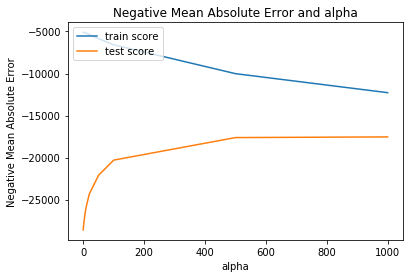

In [206]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [207]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [208]:
lasso.coef_

array([ 4.44759963e+03,  2.00514316e+03,  7.46350721e+01, -1.00238284e+03,
       -4.78708472e+02,  9.62559555e+03,  6.34722164e+03,  9.10672779e+03,
        2.82687858e+03,  5.54257867e+02,  6.72451576e+03, -0.00000000e+00,
        0.00000000e+00,  8.75808650e+03,  0.00000000e+00, -2.58675068e+01,
        0.00000000e+00,  0.00000000e+00, -2.60533024e+03,  2.61532378e+04,
        7.48458138e+02, -8.56440123e+02,  1.12791996e+03,  0.00000000e+00,
       -1.53407639e+03, -3.55753493e+03,  5.26333141e+02,  5.18241936e+02,
        2.30945583e+03,  2.89828242e+03,  3.38116113e+03,  6.71402368e+02,
        1.01116480e+03,  8.57098961e+02,  4.47886002e+02, -0.00000000e+00,
        0.00000000e+00,  6.04112439e+02, -2.09866234e+01, -2.75546573e+02,
       -9.55363945e+02,  0.00000000e+00,  4.31541736e+02,  2.05013522e+02,
       -0.00000000e+00,  1.05061185e+03,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -5.00913763e+02, -5.23625089e+02, -2.49254522e+03,
       -2.53965322e+03, -